# Otimização com Muitos Objetivos por Evolução Diferencial Aplicada ao Escalonamento Dinâmico de Projeto de Software


### QP4. Influencia das estrategias dinamicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

pd.set_option('display.float_format', '{:.2E}'.format)
pd.options.display.max_columns = 40

data = metrics_dataset(filepath="../hypervolume/metrics.csv")

dataAcc = metrics_dataset(filepath="../hypervolume/accuracy.csv", metric="accuracy")
dataStab = metrics_dataset(filepath="../hypervolume/stability.csv", metric="stability")

alpha = 0.05 # nível de significância

# configuração do gráfico de comparação pareada
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [38]:
def hv_mean(data, instance_id, algorithm_id, grouping="event", metric="hypervolume"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)[metric].mean()
    return df


def hv_measures(data, grouping="event", limit=None, metric="hypervolume"):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping, metric)[:limit]
    return measures

def hv_measures_nonzero(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            mean = hv_mean(data, inst, alg, grouping)[:limit]
            measures[inst][alg] = mean[mean.hypervolume != 0]
    return measures


def mean_hypervolume(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["hypervolume"].agg(['mean', 'std'])

def mean_accuracy(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["accuracy"].agg(['mean', 'std'])

def mean_stability(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["stability"].agg(['mean', 'std'])

def plot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms, ylabel="Hipervolume"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_acc(data, inst, algorithms, ylabel="Acurácia"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].accuracy for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_stab(data, inst, algorithms, ylabel="Estabilidade"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].stability for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [3]:
mean_hv = mean_hypervolume(data).reset_index()
mean_hv.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.26E+00                 1.28E+00   
CMODESDEExternalDynamic                   1.21E+00                 1.26E+00   
CMODESDEExternalReDynamic                 1.21E+00                 1.26E+00   
CMODESDEFullDynamic                       1.25E+00                 1.29E+00   
CMODESDEFullReDynamic                     1.25E+00                 1.28E+00   
CMODESDERepairDynamic                     1.31E+00                 1.37E+00   
NSGAIIIDynamic                            1.23E+00                 1.30E+00   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.30E+00                 1.24E+00   
CMODESDEExternalDynamic                   1.29E+00                 1.21E+00   
CMODESDEExternalReDynamic                 1.29E+00                 1.20E+00   
CMODESDEFullDynamic                       1.31E+00                 1.23E+00   
CMODESDEFullReDynamic                     1.30E+00                 1.22E+00   
CMODESDERepairDynamic                     1.42E+00                 1.29E+00   
NSGAIIIDynamic                            1.41E+00                 1.22E+00   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          1.32E+00                1.27E+00   
CMODESDEExternalDynamic                  1.25E+00                1.20E+00   
CMODESDEExternalReDynamic                1.24E+00                1.18E+00   
CMODESDEFullDynamic                      1.32E+00                1.27E+00   
CMODESDEFullReDynamic                    1.32E+00                1.26E+00   
CMODESDERepairDynamic                    1.35E+00                1.26E+00   
NSGAIIIDynamic                           1.35E+00                1.24E+00   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.29E+00                 1.28E+00   
CMODESDEExternalDynamic                   1.24E+00                 1.18E+00   
CMODESDEExternalReDynamic                 1.23E+00                 1.17E+00   
CMODESDEFullDynamic                       1.29E+00                 1.26E+00   
CMODESDEFullReDynamic                     1.27E+00                 1.25E+00   
CMODESDERepairDynamic                     1.38E+00                 1.30E+00   
NSGAIIIDynamic                            1.31E+00                 1.24E+00   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.24E+00                 1.23E+00   
CMODESDEExternalDynamic                   1.20E+00                 1.20E+00   
CMODESDEExternalReDynamic                 1.19E+00                 1.19E+00   
CMODESDEFullDynamic                       1.24E+00                 1.24E+00   
CMODESDEFullReDynamic                     1.22E+00                 1.21E+00   
CMODESDERepairDynamic                     1.30E+00                 1.26E+00   
NSGAIIIDynamic                            1.26E+00                 1.20E+00   

                                                                           \
instance                  ST20_DT1

In [4]:
mean_acc = mean_accuracy(dataAcc).reset_index()
mean_acc.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           8.92E-01                 9.07E-01   
CMODESDEExternalDynamic                   8.69E-01                 9.01E-01   
CMODESDEExternalReDynamic                 8.71E-01                 8.95E-01   
CMODESDEFullDynamic                       8.91E-01                 9.05E-01   
CMODESDEFullReDynamic                     8.86E-01                 9.01E-01   
CMODESDERepairDynamic                     9.25E-01                 9.55E-01   
NSGAIIIDynamic                            8.85E-01                 9.14E-01   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.51E-01                 8.94E-01   
CMODESDEExternalDynamic                   9.53E-01                 8.85E-01   
CMODESDEExternalReDynamic                 9.53E-01                 8.80E-01   
CMODESDEFullDynamic                       9.51E-01                 8.95E-01   
CMODESDEFullReDynamic                     9.53E-01                 8.86E-01   
CMODESDERepairDynamic                     9.87E-01                 9.23E-01   
NSGAIIIDynamic                            9.84E-01                 8.90E-01   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          9.28E-01                9.01E-01   
CMODESDEExternalDynamic                  9.03E-01                8.73E-01   
CMODESDEExternalReDynamic                9.00E-01                8.60E-01   
CMODESDEFullDynamic                      9.27E-01                9.04E-01   
CMODESDEFullReDynamic                    9.28E-01                8.97E-01   
CMODESDERepairDynamic                    9.52E-01                9.01E-01   
NSGAIIIDynamic                           9.58E-01                8.93E-01   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.32E-01                 9.45E-01   
CMODESDEExternalDynamic                   9.26E-01                 9.09E-01   
CMODESDEExternalReDynamic                 9.25E-01                 9.10E-01   
CMODESDEFullDynamic                       9.34E-01                 9.42E-01   
CMODESDEFullReDynamic                     9.26E-01                 9.35E-01   
CMODESDERepairDynamic                     9.81E-01                 9.67E-01   
NSGAIIIDynamic                            9.59E-01                 9.50E-01   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.30E-01                 9.39E-01   
CMODESDEExternalDynamic                   9.19E-01                 9.23E-01   
CMODESDEExternalReDynamic                 9.20E-01                 9.24E-01   
CMODESDEFullDynamic                       9.31E-01                 9.46E-01   
CMODESDEFullReDynamic                     9.23E-01                 9.25E-01   
CMODESDERepairDynamic                     9.63E-01                 9.55E-01   
NSGAIIIDynamic                            9.62E-01                 9.32E-01   

                                                                           \
instance                  ST20_DT1

In [5]:
mean_stab = mean_stability(dataStab).reset_index()
mean_stab.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.14E-01                 1.12E-01   
CMODESDEExternalDynamic                   1.06E-01                 1.17E-01   
CMODESDEExternalReDynamic                 9.83E-02                 1.41E-01   
CMODESDEFullDynamic                       1.45E-01                 1.44E-01   
CMODESDEFullReDynamic                     1.23E-01                 1.71E-01   
CMODESDERepairDynamic                     1.63E-01                 1.71E-01   
NSGAIIIDynamic                            1.54E-01                 1.87E-01   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.44E-01                 1.64E-01   
CMODESDEExternalDynamic                   1.43E-01                 1.71E-01   
CMODESDEExternalReDynamic                 1.05E-01                 1.42E-01   
CMODESDEFullDynamic                       1.57E-01                 2.04E-01   
CMODESDEFullReDynamic                     1.43E-01                 1.43E-01   
CMODESDERepairDynamic                     2.69E-01                 1.80E-01   
NSGAIIIDynamic                            4.63E-01                 1.77E-01   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          1.23E-01                1.23E-01   
CMODESDEExternalDynamic                  1.16E-01                8.28E-02   
CMODESDEExternalReDynamic                1.02E-01                6.75E-02   
CMODESDEFullDynamic                      1.54E-01                5.71E-02   
CMODESDEFullReDynamic                    1.41E-01                9.41E-02   
CMODESDERepairDynamic                    1.10E-01                1.26E-01   
NSGAIIIDynamic                           1.62E-01                1.19E-01   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           2.41E-01                 1.70E-01   
CMODESDEExternalDynamic                   1.58E-01                 1.28E-01   
CMODESDEExternalReDynamic                 1.81E-01                 1.47E-01   
CMODESDEFullDynamic                       2.14E-01                 1.69E-01   
CMODESDEFullReDynamic                     1.96E-01                 1.71E-01   
CMODESDERepairDynamic                     2.20E-01                 1.63E-01   
NSGAIIIDynamic                            2.40E-01                 1.76E-01   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           2.43E-01                 1.64E-01   
CMODESDEExternalDynamic                   1.62E-01                 1.94E-01   
CMODESDEExternalReDynamic                 1.34E-01                 1.71E-01   
CMODESDEFullDynamic                       2.55E-01                 1.90E-01   
CMODESDEFullReDynamic                     2.28E-01                 1.79E-01   
CMODESDERepairDynamic                     2.66E-01                 2.40E-01   
NSGAIIIDynamic                            2.67E-01                 1.91E-01   

                                                                           \
instance                  ST20_DT1

In [34]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

## Comparação entre os algoritmos SEM o uso de estratégias dinâmicas

### Instância ST10_DT10_SE5_DE1_SK4-5

None

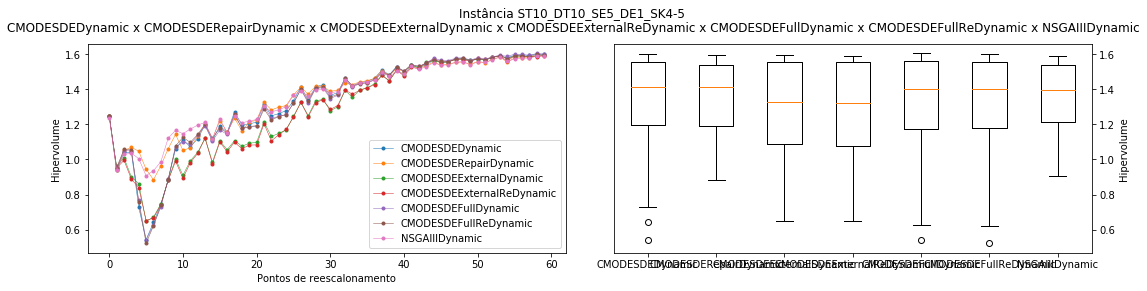

In [39]:
inst = "ST10_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

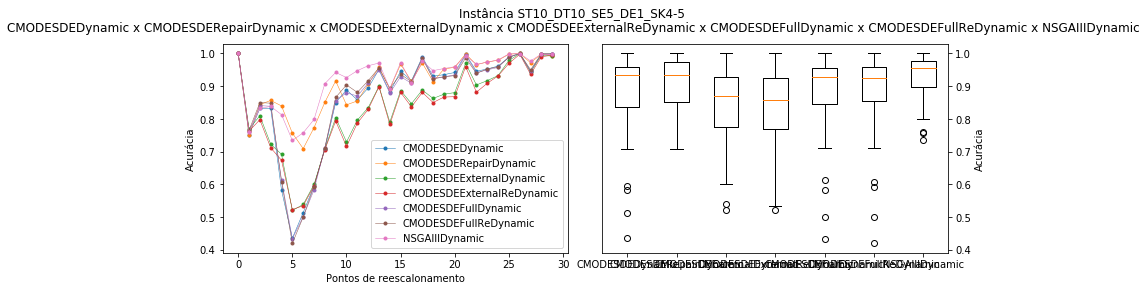

In [17]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

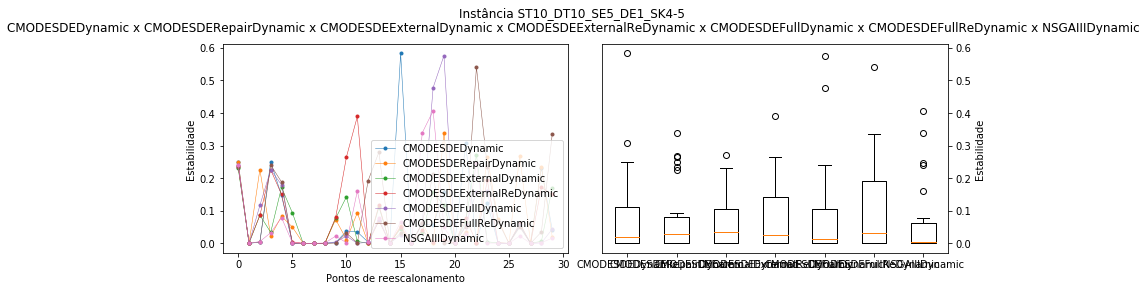

In [18]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [19]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=81.929, p=1.426964E-15
Distribuições diferentes (rejeitar H0)


In [20]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=82.652, p=1.011122E-15
Distribuições diferentes (rejeitar H0)


In [21]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=2.530, p=8.650635E-01
Mesmas distribuições (falhou em rejeitar H0)


In [22]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDEDynamic,CMODESDEExternalDynamic,CMODESDEExternalReDynamic,CMODESDEFullDynamic,CMODESDEFullReDynamic,CMODESDERepairDynamic,NSGAIIIDynamic
CMODESDEDynamic,-1.00E+00,5.33E-02,3.19E-02,8.21E-01,9.14E-01,6.01E-01,4.54E-01
CMODESDEExternalDynamic,5.33E-02,-1.00E+00,8.28E-01,8.74E-02,6.80E-02,1.44E-02,7.66E-03
CMODESDEExternalReDynamic,3.19E-02,8.28E-01,-1.00E+00,5.44E-02,4.14E-02,7.86E-03,4.01E-03
CMODESDEFullDynamic,8.21E-01,8.74E-02,5.44E-02,-1.00E+00,9.07E-01,4.54E-01,3.30E-01
CMODESDEFullReDynamic,9.14E-01,6.80E-02,4.14E-02,9.07E-01,-1.00E+00,5.28E-01,3.92E-01
CMODESDERepairDynamic,6.01E-01,1.44E-02,7.86E-03,4.54E-01,5.28E-01,-1.00E+00,8.21E-01
NSGAIIIDynamic,4.54E-01,7.66E-03,4.01E-03,3.30E-01,3.92E-01,8.21E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f97f9832550>,
 <matplotlib.colorbar.ColorbarBase at 0x7f97f9ba1470>)

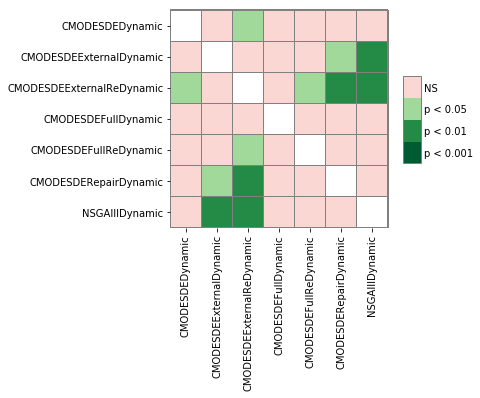

In [23]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK4-5

None

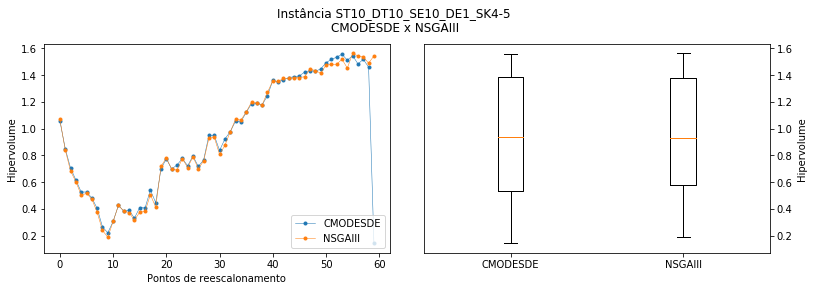

In [15]:
inst = "ST10_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

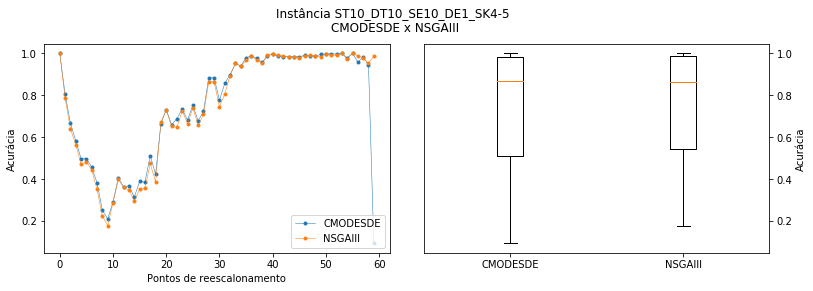

In [16]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

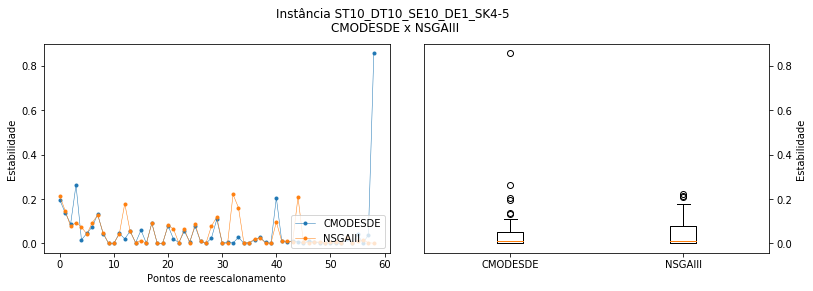

In [17]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [18]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=519.000, p=3.554666E-03
Distribuições diferentes (rejeitar H0)


In [19]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=244.000, p=3.690648E-06
Distribuições diferentes (rejeitar H0)


In [20]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=604.000, p=3.236018E-01
Mesmas distribuições (falhou em rejeitar H0)


In [21]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,9.29E-01
NSGAIII,9.29E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1717339cf8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f17173b7f98>)

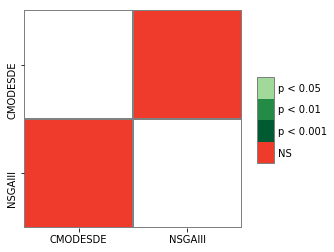

In [22]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK4-5

None

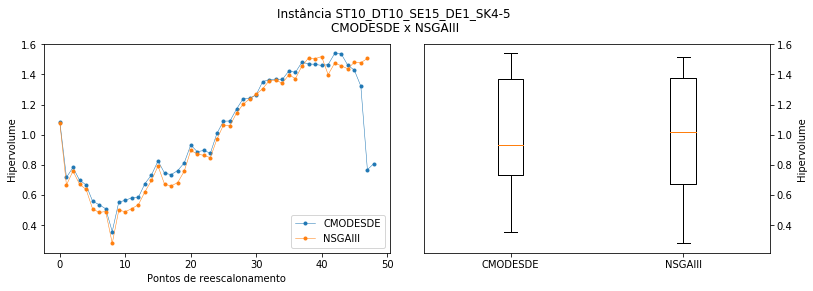

In [24]:
inst = "ST10_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

#print(datasets)
#np.delete(datasets[0], 48, 0)
#aux = datasets[0][:]
#del aux[48]
#datasets[0] = aux

#auxAcc = datasetsAcc[0][:]
#del auxAcc[48]
#datasetsAcc[0] = auxAcc

#print(datasetsStab)
#auxStab = datasetsStab[0][:]
#del auxStab[47]
#datasetsStab[0] = auxStab
#print(datasets)

None

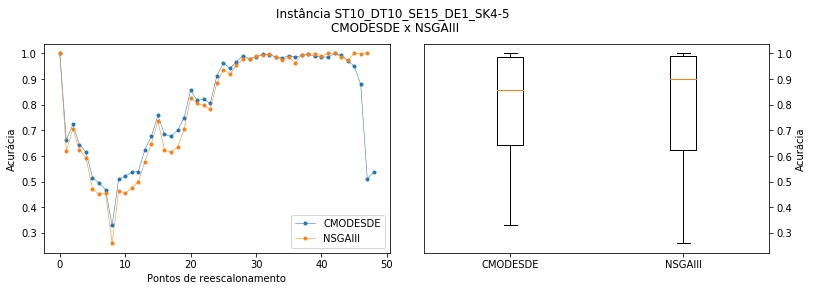

In [25]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

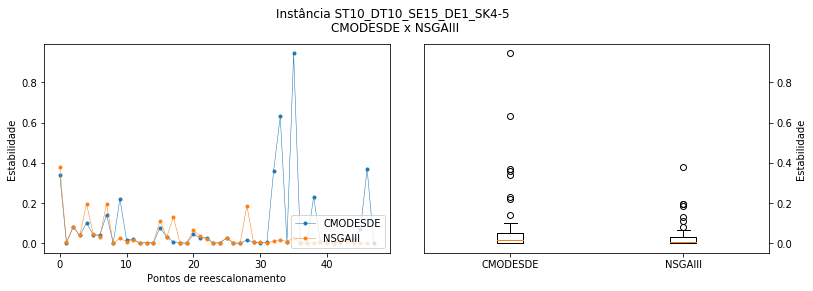

In [26]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [27]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=215.000, p=1.304056E-04
Distribuições diferentes (rejeitar H0)


In [28]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=194.000, p=1.533123E-04
Distribuições diferentes (rejeitar H0)


In [29]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=404.000, p=2.882413E-01
Mesmas distribuições (falhou em rejeitar H0)


In [30]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,7.99E-01
NSGAIII,7.99E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170ded1d30>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170de25f28>)

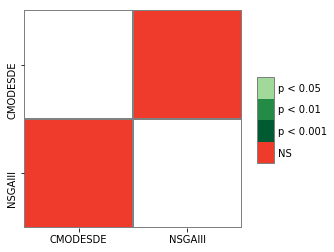

In [31]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE5_DE1_SK6-7

None

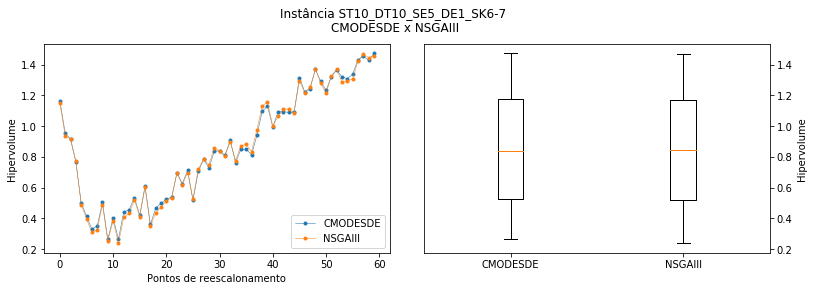

In [32]:
inst = "ST10_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

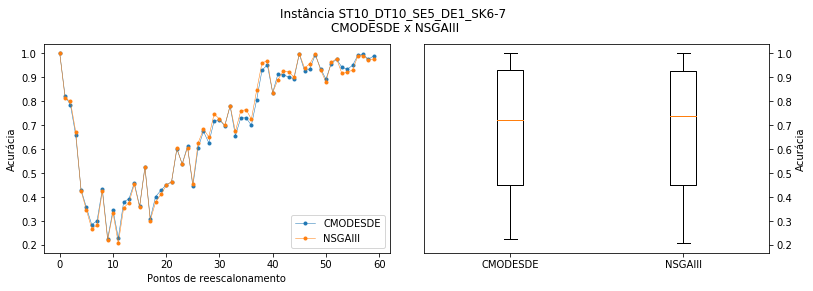

In [33]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

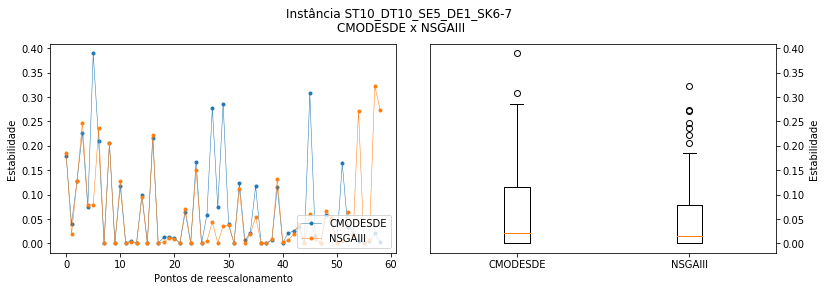

In [34]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [35]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=684.000, p=8.903122E-02
Mesmas distribuições (falhou em rejeitar H0)


In [36]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=865.000, p=8.800076E-01
Mesmas distribuições (falhou em rejeitar H0)


In [37]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=500.000, p=3.667510E-01
Mesmas distribuições (falhou em rejeitar H0)


In [38]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,9.00E-01
NSGAIII,9.00E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170e36d2b0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f17172d6908>)

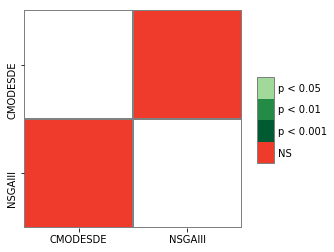

In [39]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK6-7

None

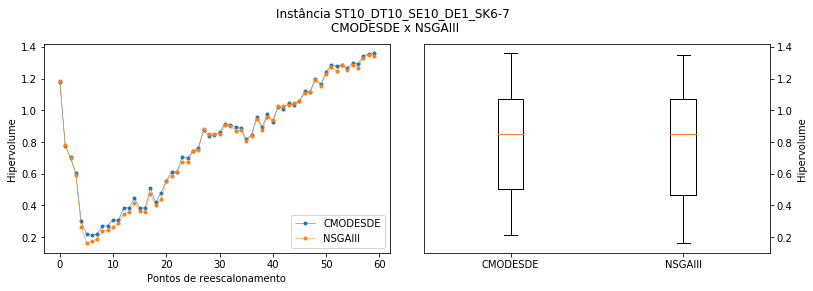

In [40]:
inst = "ST10_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

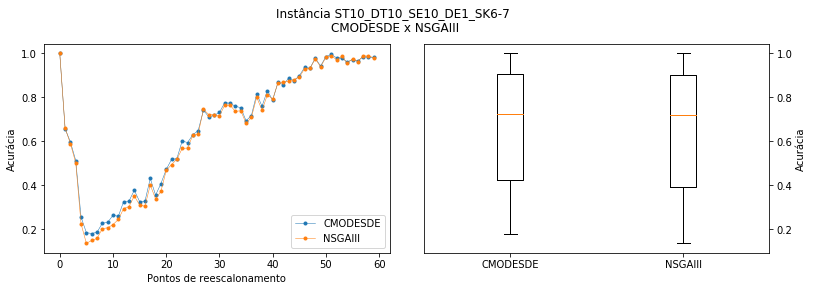

In [41]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

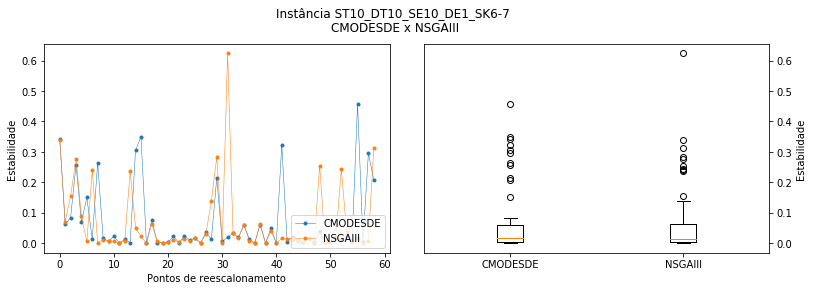

In [42]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [43]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=184.000, p=7.393677E-08
Distribuições diferentes (rejeitar H0)


In [44]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=189.000, p=1.493238E-07
Distribuições diferentes (rejeitar H0)


In [45]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=821.000, p=7.893837E-01
Mesmas distribuições (falhou em rejeitar H0)


In [46]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,7.62E-01
NSGAIII,7.62E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170dd719b0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170dd4f160>)

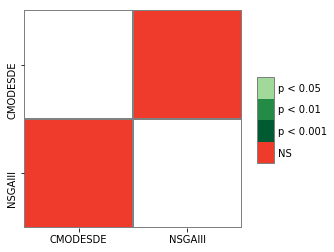

In [47]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK6-7

None

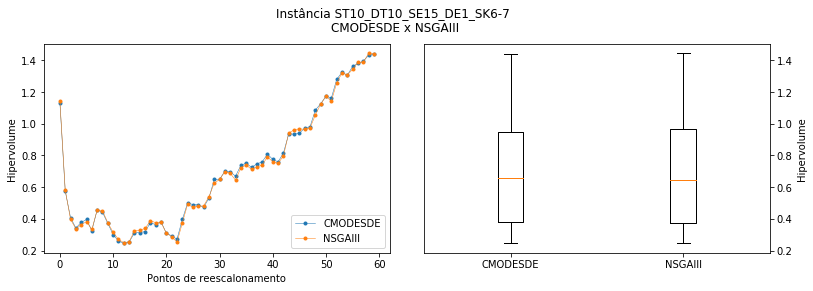

In [48]:
inst = "ST10_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

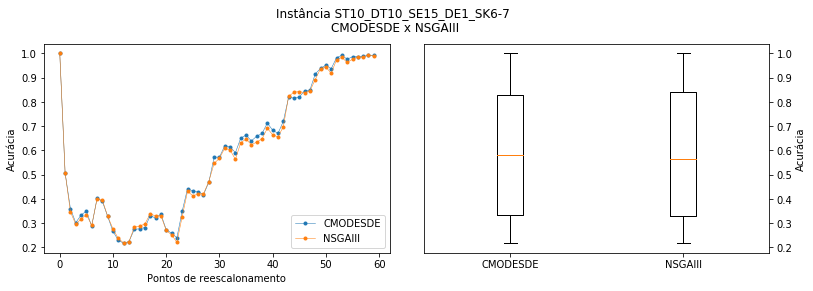

In [49]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

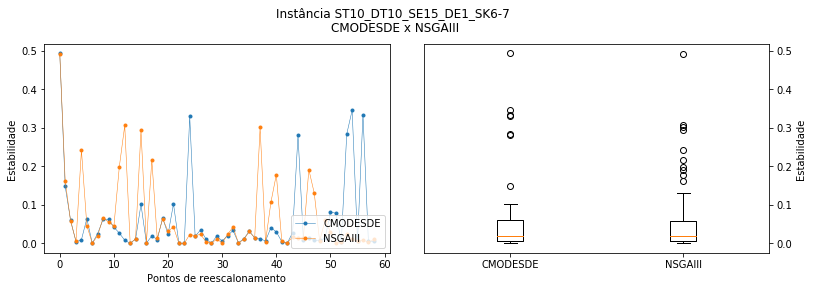

In [50]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [51]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=643.000, p=4.524646E-02
Distribuições diferentes (rejeitar H0)


In [52]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=404.000, p=2.827889E-04
Distribuições diferentes (rejeitar H0)


In [53]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=848.000, p=9.536948E-01
Mesmas distribuições (falhou em rejeitar H0)


In [54]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,9.54E-01
NSGAIII,9.54E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170da6cc50>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170db2a0b8>)

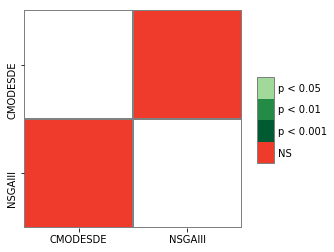

In [55]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK4-5

None

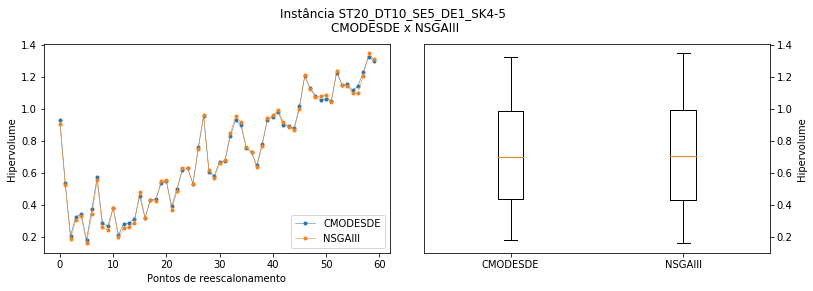

In [56]:
inst = "ST20_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

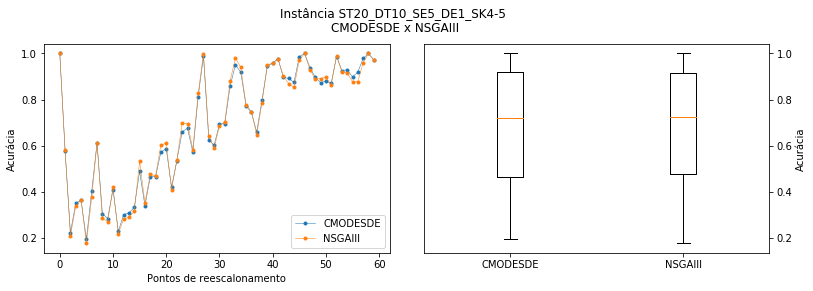

In [57]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

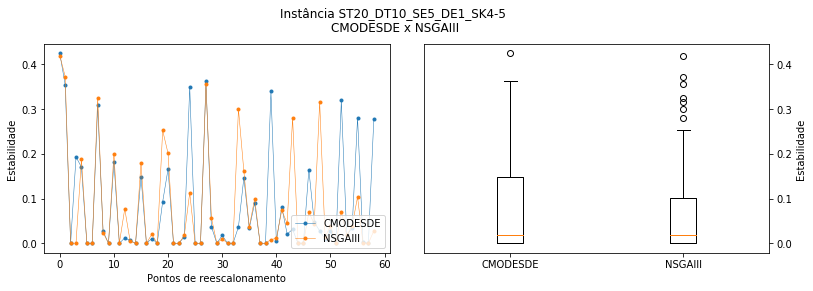

In [58]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [59]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=682.000, p=8.629876E-02
Mesmas distribuições (falhou em rejeitar H0)


In [60]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=779.000, p=7.058783E-01
Mesmas distribuições (falhou em rejeitar H0)


In [61]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=345.000, p=2.678879E-01
Mesmas distribuições (falhou em rejeitar H0)


In [62]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,9.33E-01
NSGAIII,9.33E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f17171de4a8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f171739d470>)

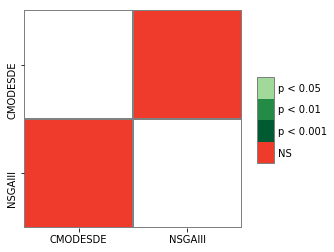

In [63]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK4-5

None

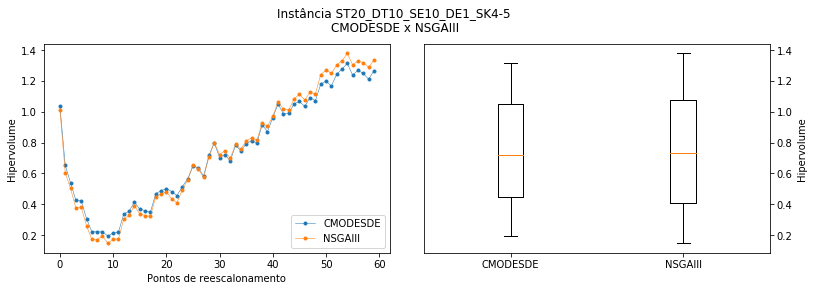

In [64]:
inst = "ST20_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

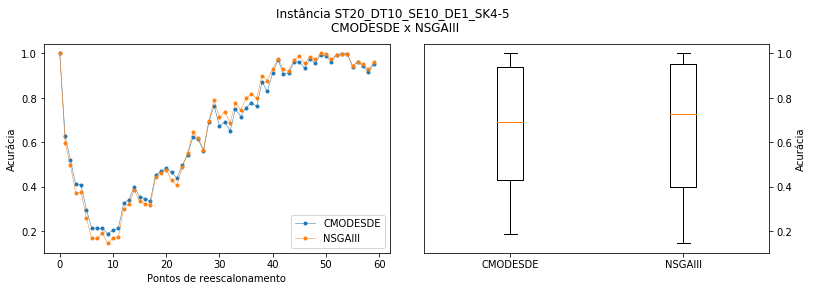

In [65]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

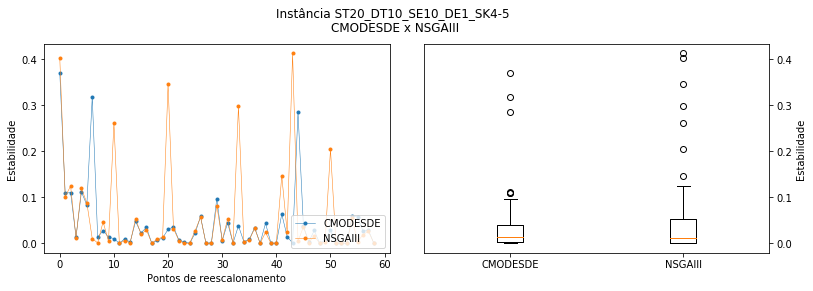

In [66]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [67]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=822.000, p=4.935780E-01
Mesmas distribuições (falhou em rejeitar H0)


In [68]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=852.000, p=8.032964E-01
Mesmas distribuições (falhou em rejeitar H0)


In [69]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=708.000, p=7.664264E-01
Mesmas distribuições (falhou em rejeitar H0)


In [70]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,9.25E-01
NSGAIII,9.25E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170e079da0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170ddfa630>)

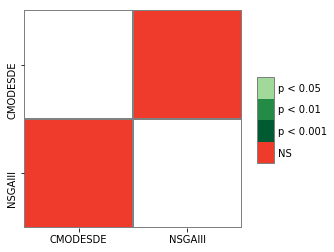

In [71]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK4-5

None

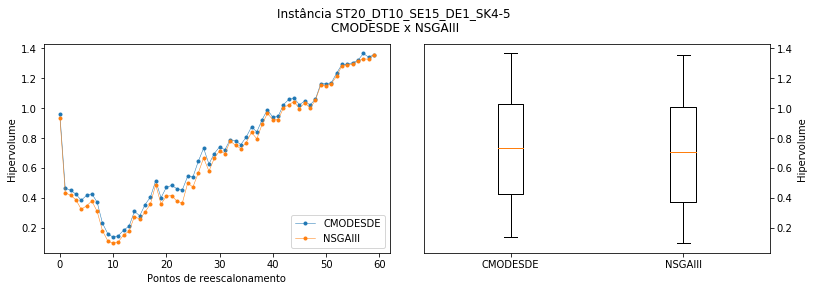

In [72]:
inst = "ST20_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

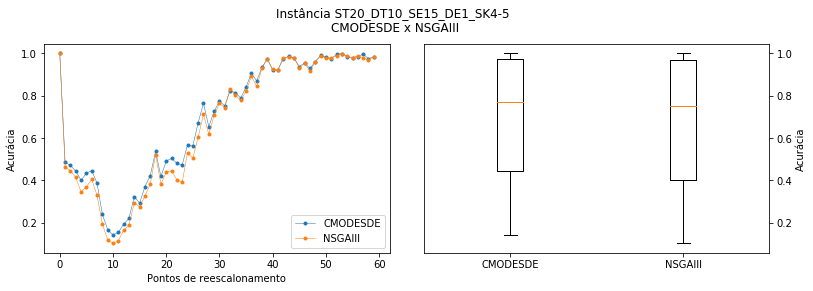

In [73]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

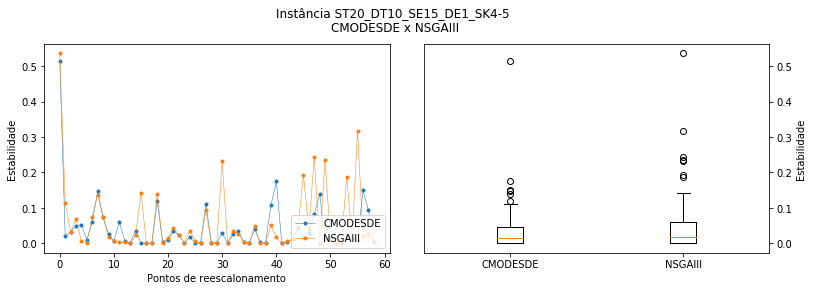

In [74]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [75]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [76]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=104.000, p=3.747512E-09
Distribuições diferentes (rejeitar H0)


In [77]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=698.000, p=5.463388E-01
Mesmas distribuições (falhou em rejeitar H0)


In [78]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,4.91E-01
NSGAIII,4.91E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170da37f98>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170e0ce4a8>)

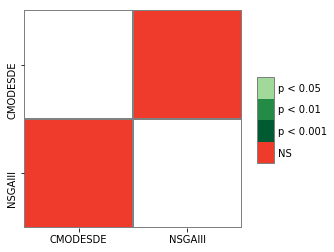

In [79]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK6-7

None

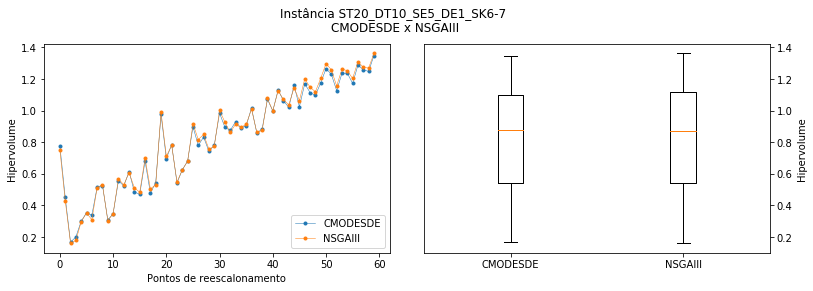

In [80]:
inst = "ST20_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

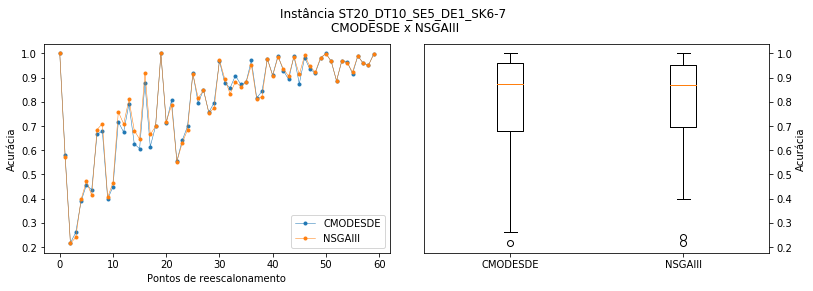

In [81]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

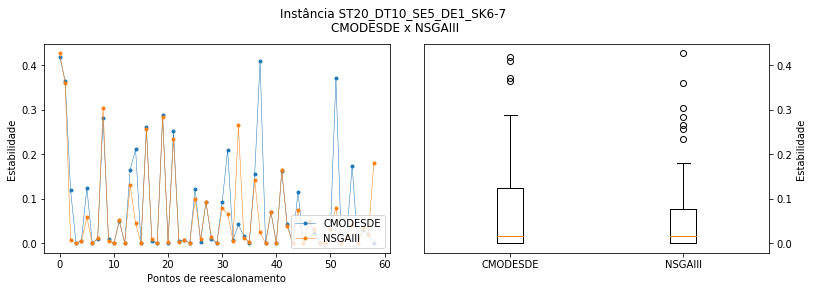

In [82]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [83]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=457.000, p=7.472906E-04
Distribuições diferentes (rejeitar H0)


In [84]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=722.000, p=3.013216E-01
Mesmas distribuições (falhou em rejeitar H0)


In [85]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=410.000, p=6.790073E-02
Mesmas distribuições (falhou em rejeitar H0)


In [86]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,8.51E-01
NSGAIII,8.51E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170e482e80>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170dc88f98>)

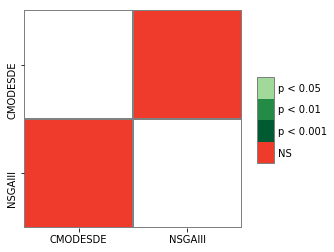

In [87]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK6-7

None

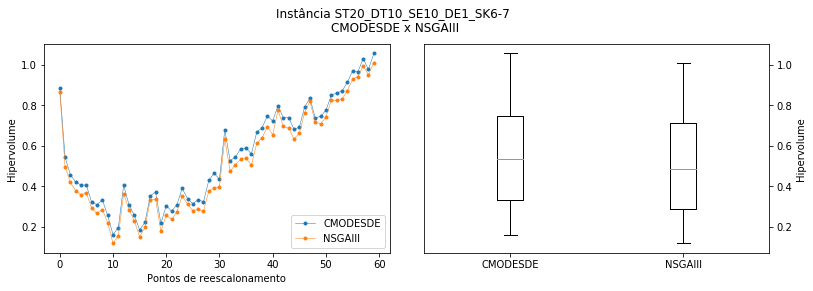

In [88]:
inst = "ST20_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

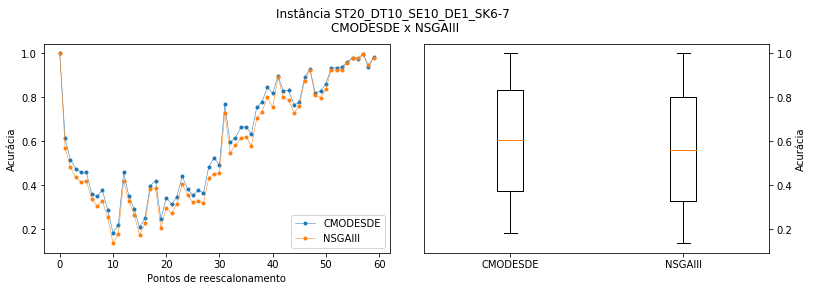

In [89]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

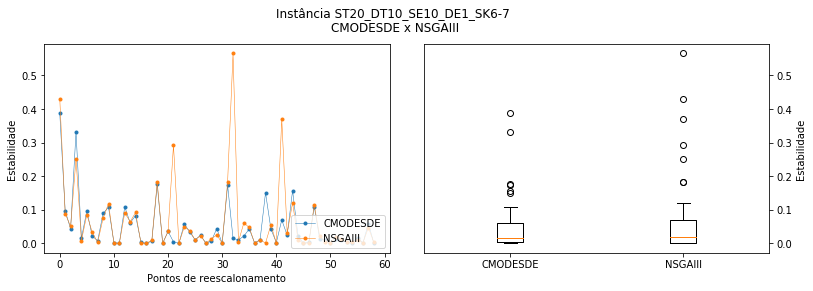

In [90]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [91]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [92]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=17.000, p=5.690740E-11
Distribuições diferentes (rejeitar H0)


In [93]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=620.000, p=6.869048E-01
Mesmas distribuições (falhou em rejeitar H0)


In [94]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,3.34E-01
NSGAIII,3.34E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170dfb3278>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170d96ca58>)

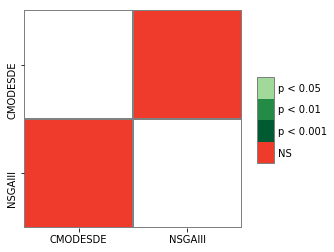

In [95]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK6-7

None

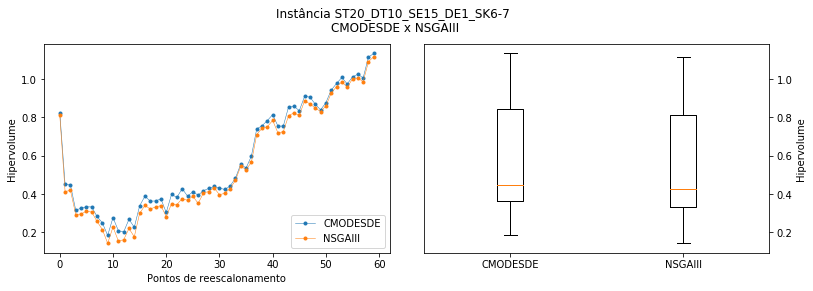

In [96]:
inst = "ST20_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]  

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

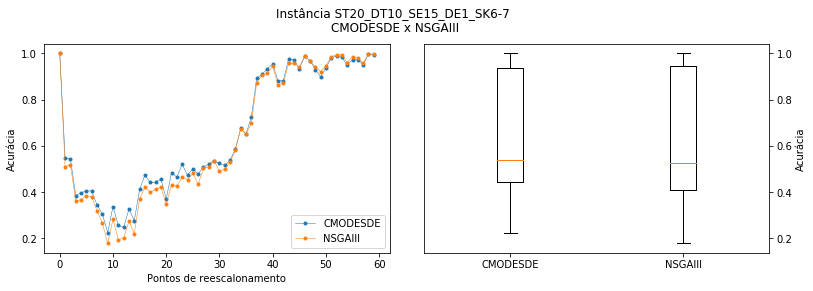

In [97]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

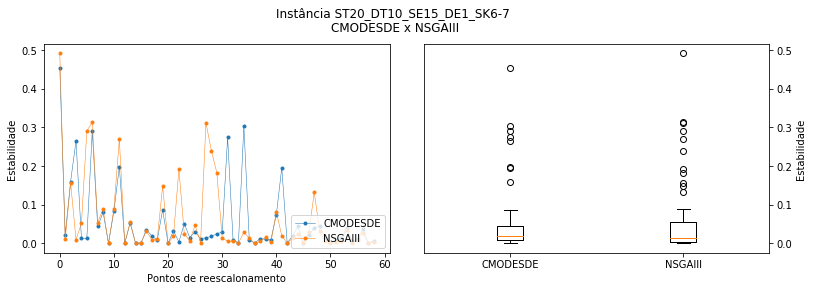

In [98]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [99]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [100]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=226.000, p=6.554600E-07
Distribuições diferentes (rejeitar H0)


In [101]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=723.000, p=8.666625E-01
Mesmas distribuições (falhou em rejeitar H0)


In [102]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,4.00E-01
NSGAIII,4.00E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170dbfd630>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170e046a58>)

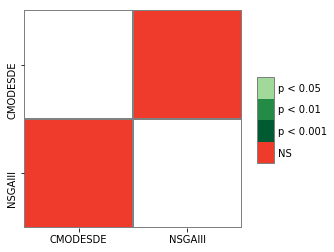

In [103]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK4-5

None

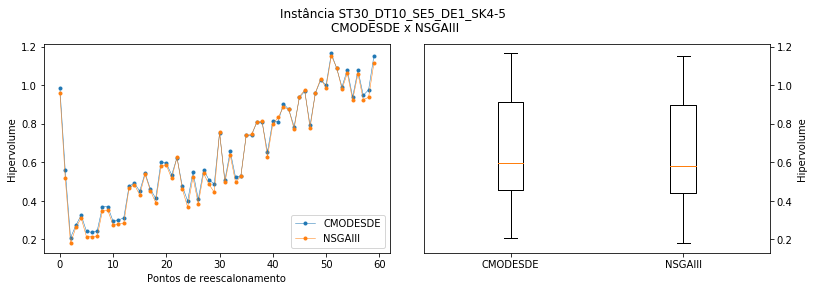

In [104]:
inst = "ST30_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

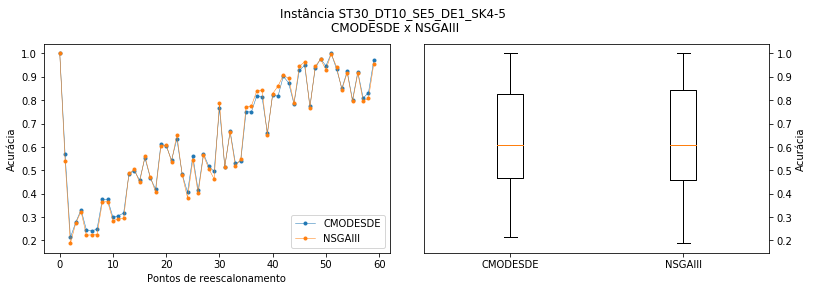

In [105]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

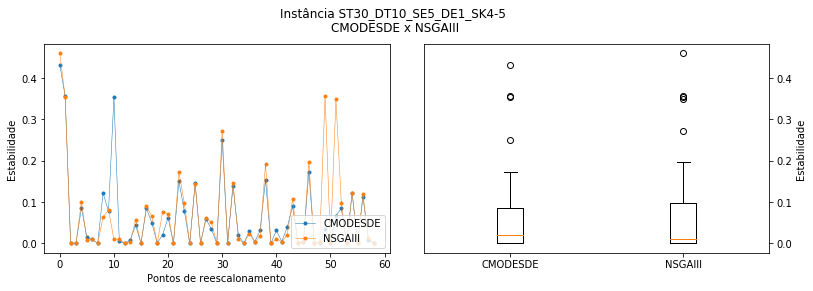

In [106]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [107]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=124.000, p=5.779088E-09
Distribuições diferentes (rejeitar H0)


In [108]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=646.000, p=7.123660E-02
Mesmas distribuições (falhou em rejeitar H0)


In [109]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=276.000, p=2.820717E-02
Distribuições diferentes (rejeitar H0)


In [110]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,7.15E-01
NSGAIII,7.15E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170df2deb8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170df8ecc0>)

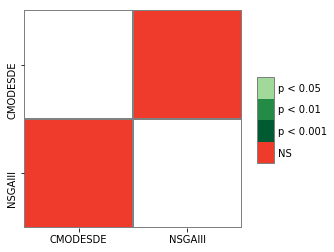

In [111]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK4-5

None

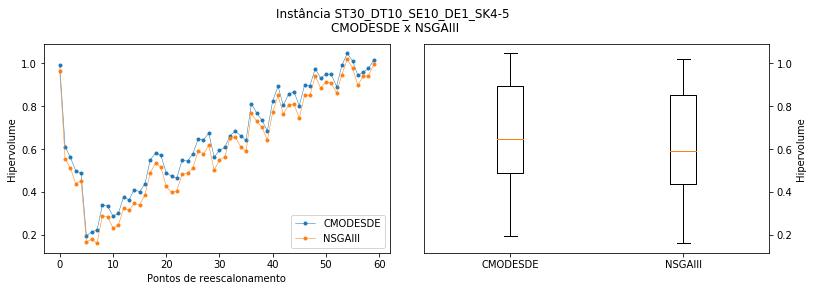

In [112]:
inst = "ST30_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

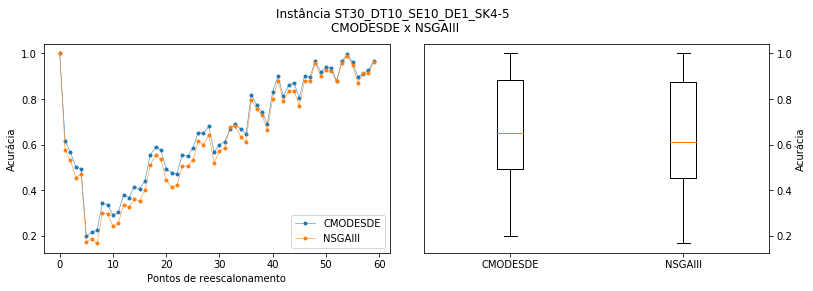

In [113]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

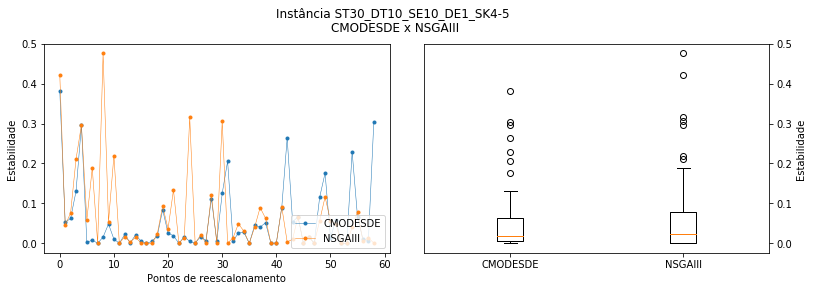

In [114]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [115]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [116]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=10.000, p=3.989178E-11
Distribuições diferentes (rejeitar H0)


In [117]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=571.000, p=2.008180E-01
Mesmas distribuições (falhou em rejeitar H0)


In [118]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,2.65E-01
NSGAIII,2.65E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170d7cdcf8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170d72c630>)

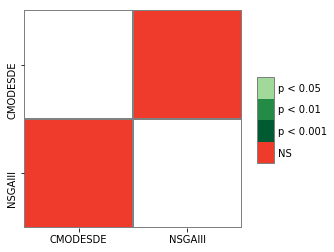

In [119]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK4-5

None

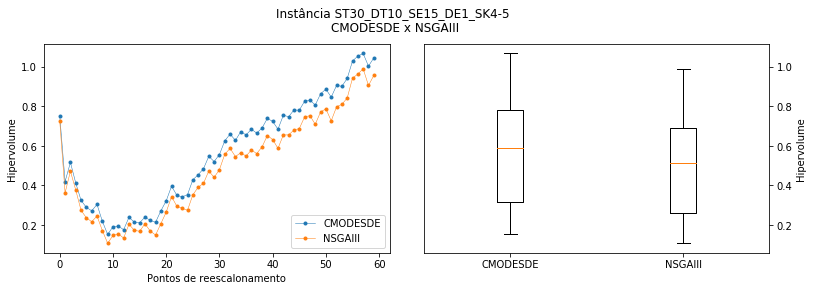

In [120]:
inst = "ST30_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

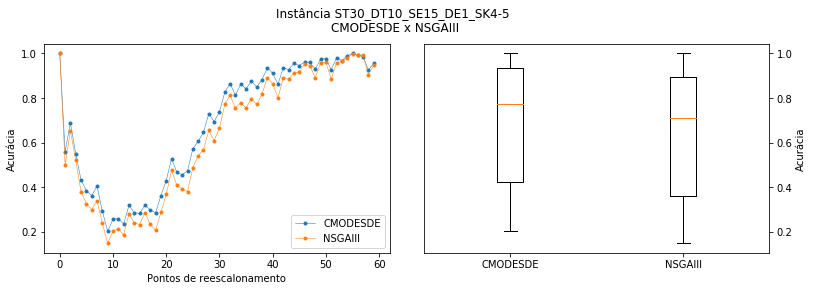

In [121]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

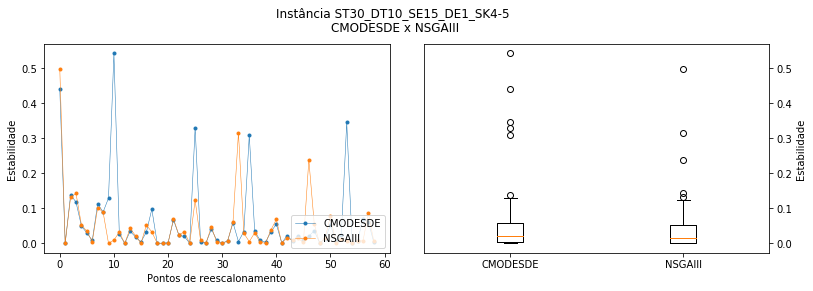

In [122]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [123]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [124]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=4.000, p=2.935577E-11
Distribuições diferentes (rejeitar H0)


In [125]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=746.000, p=8.406320E-01
Mesmas distribuições (falhou em rejeitar H0)


In [126]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,1.19E-01
NSGAIII,1.19E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170ded1ef0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170e3b1128>)

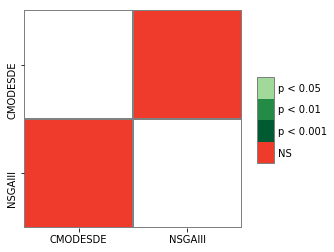

In [127]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK6-7

None

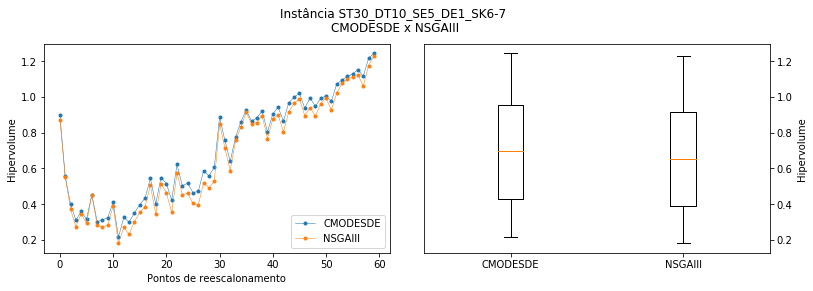

In [128]:
inst = "ST30_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

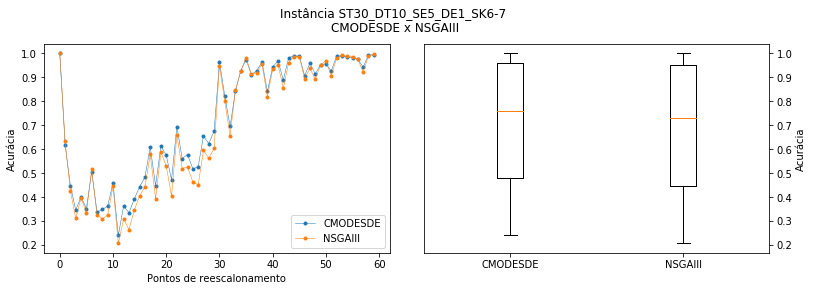

In [129]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

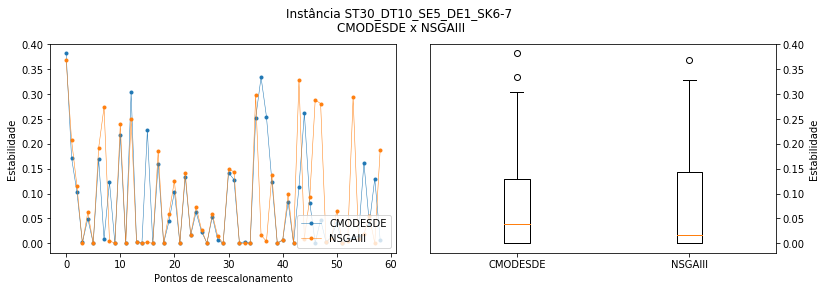

In [130]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [131]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=0.000, p=1.629556E-11
Distribuições diferentes (rejeitar H0)


In [132]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=128.000, p=1.104693E-08
Distribuições diferentes (rejeitar H0)


In [133]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=433.000, p=7.417387E-02
Mesmas distribuições (falhou em rejeitar H0)


In [134]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,3.21E-01
NSGAIII,3.21E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170df9a978>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170dcdd7f0>)

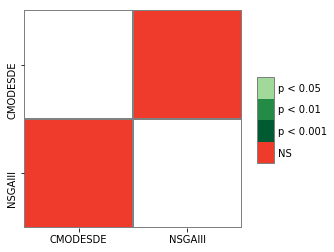

In [135]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK6-7

None

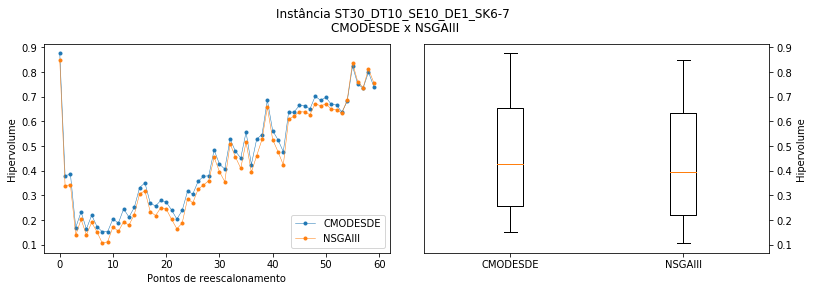

In [136]:
inst = "ST30_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

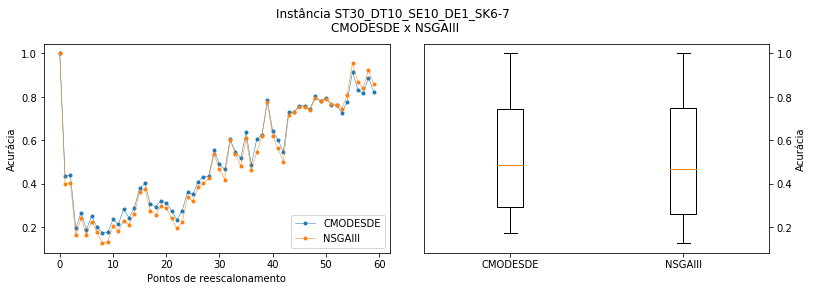

In [137]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

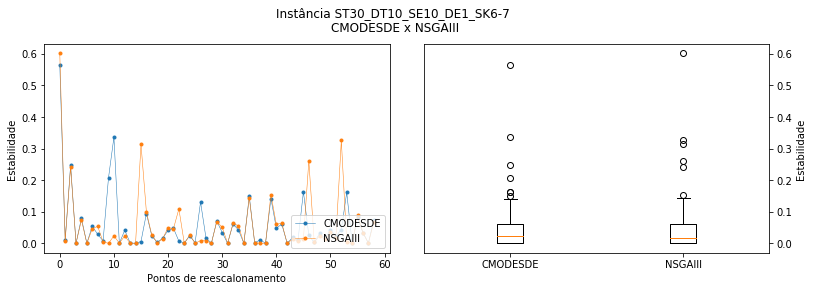

In [138]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [139]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=26.000, p=5.970872E-11
Distribuições diferentes (rejeitar H0)


In [140]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=286.000, p=6.147913E-06
Distribuições diferentes (rejeitar H0)


In [141]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=593.000, p=5.117323E-01
Mesmas distribuições (falhou em rejeitar H0)


In [142]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,3.52E-01
NSGAIII,3.52E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170d54de10>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170d63a748>)

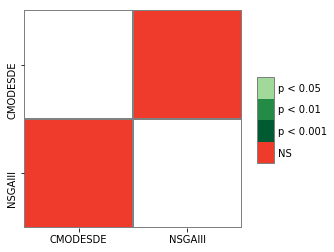

In [143]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK6-7

None

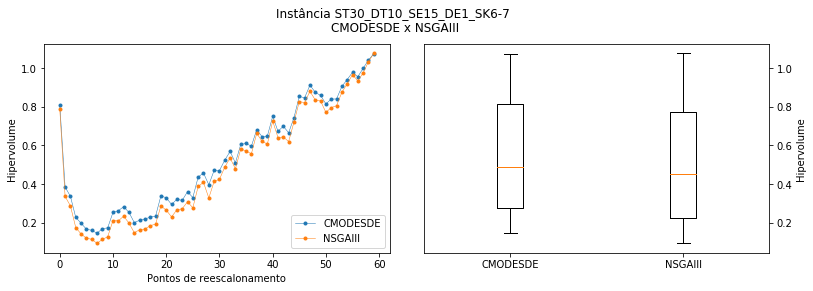

In [144]:
inst = "ST30_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

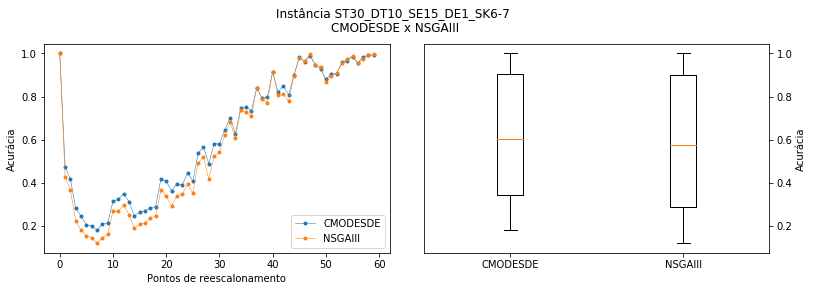

In [145]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

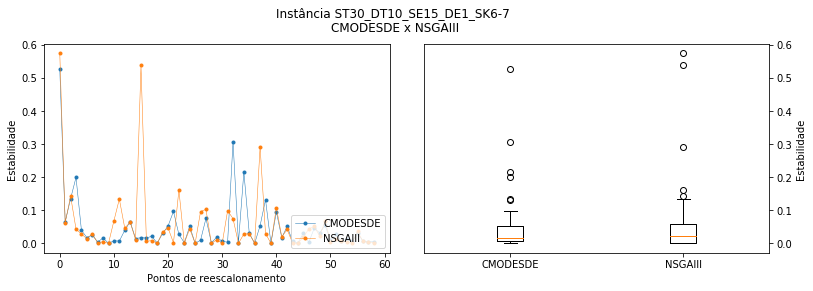

In [146]:
display(combined_plot_stab(stab_event, inst, algorithms))

In [147]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=1.000, p=1.714149E-11
Distribuições diferentes (rejeitar H0)


In [148]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=100.000, p=3.119913E-09
Distribuições diferentes (rejeitar H0)


In [149]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=671.000, p=5.381384E-01
Mesmas distribuições (falhou em rejeitar H0)


In [150]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODESDE,NSGAIII
CMODESDE,-1.00E+00,3.13E-01
NSGAIII,3.13E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f170dc53a58>,
 <matplotlib.colorbar.ColorbarBase at 0x7f170e3c6ac8>)

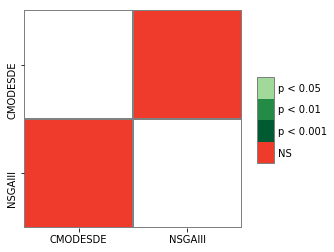

In [151]:
sp.sign_plot(pc, **heatmap_args)